In [47]:

#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# File paths
customers_path = '/mnt/data/Customers.csv'
products_path = '/mnt/data/Products.csv'
transactions_path = '/mnt/data/Transactions.csv'



In [48]:
#loading dataset
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")



In [49]:
# Basic Dataset Information
print("Products Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())
print("\nCustomers Dataset Info:")
print(customers.info())

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2)

In [50]:
# Data Cleaning and merging
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")

# Display merged data
print(merged_data)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x          CustomerName         Region SignupDate  \
0        300.68   300.68        Andrea Jenkins         Euro

In [51]:
# Checking for missing values
print("\nMissing values in Products dataset:")
print(products.isnull().sum())
print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())
print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())


Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


1     66376
2     51459
3     47828
4     57519
5     64527
6     48771
7     71366
8     63436
9     70603
10    47063
11    38224
12    62818
Name: TotalValue, dtype: int32


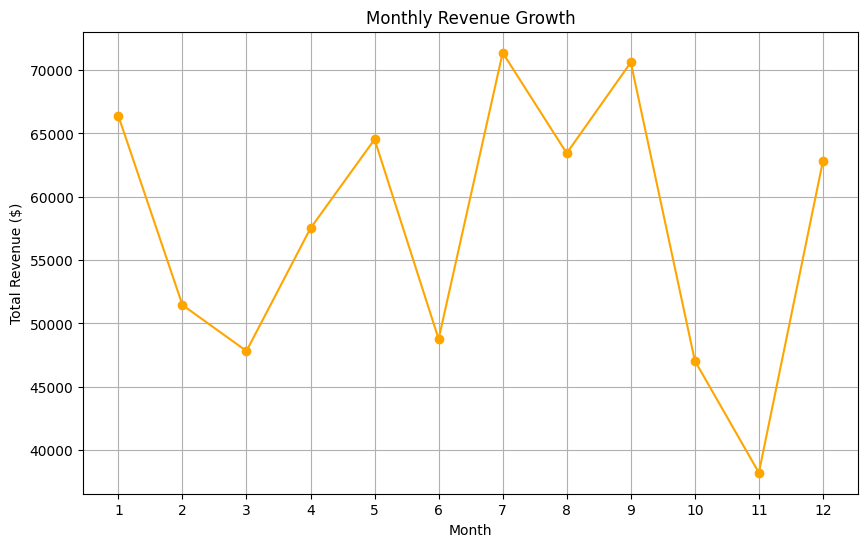

In [52]:
# Assuming 'Date' and 'Revenue' columns in the transactions_df


transactions = pd.read_csv("Transactions.csv")


# Convert 'TransactionDate' to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract the month from 'TransactionDate'
transactions['Month'] = transactions['TransactionDate'].dt.month

# Group by 'Month' and sum the 'TotalValue' to calculate monthly sales
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Ensure all months (1-12) are present, filling missing months with 0
all_months = pd.Series(0, index=range(1, 13), name="TotalValue")
monthly_sales = all_months.add(monthly_sales, fill_value=0).astype(int)

# Print the monthly sales
print(monthly_sales)


# Visualize monthly revenue
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6), color='orange')
plt.title('Monthly Revenue Growth')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


C:\Users\hi\AppData\Local\Temp\ipykernel_20664\2319229502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="magma")


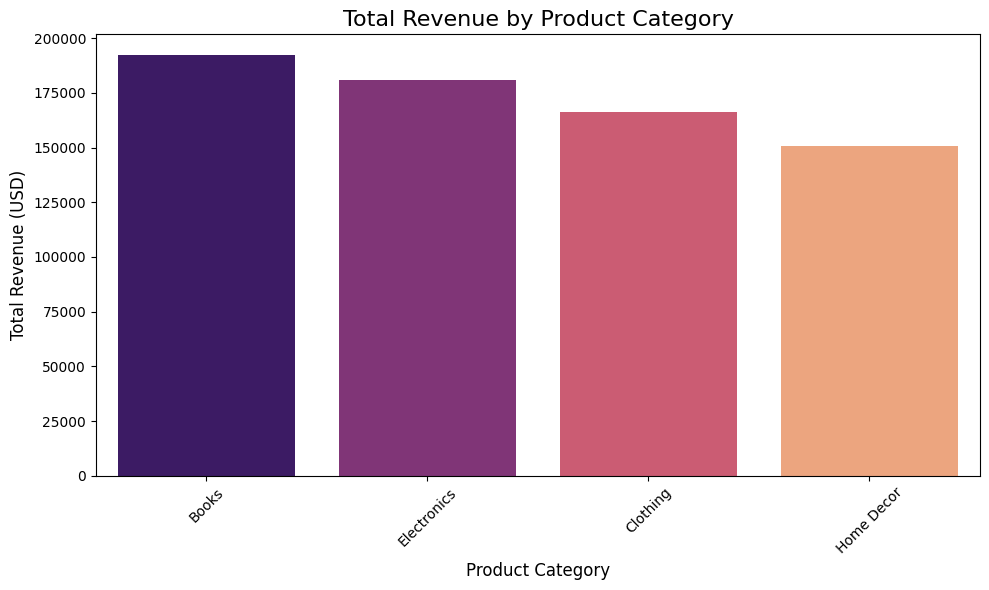

In [53]:


# Calculate total revenue by product category
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Visualize total revenue by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="magma")
plt.title("Total Revenue by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

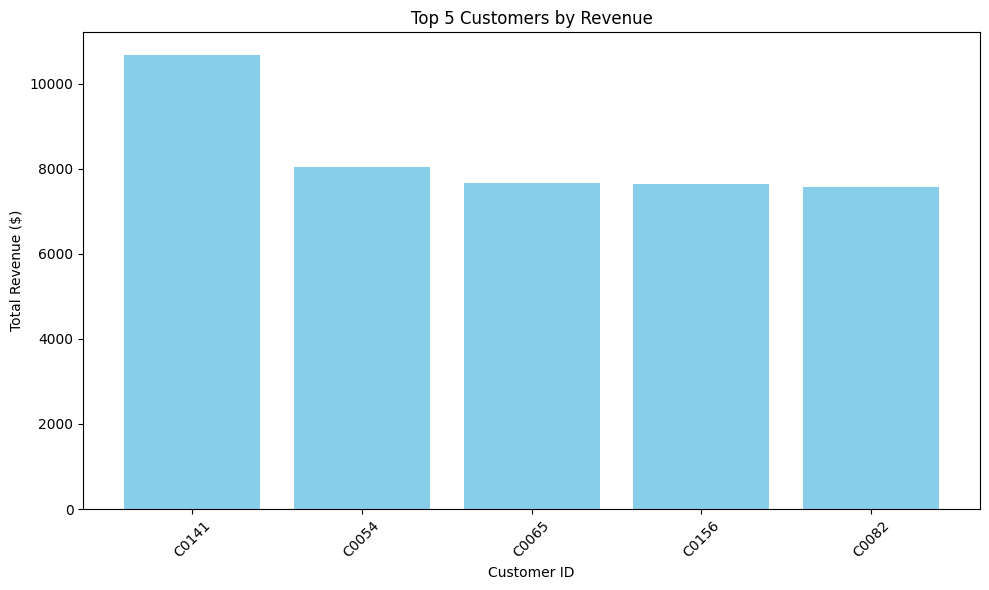

In [54]:
# Top Customers (Revenue Contribution)
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'], top_customers['TotalValue'], color='skyblue')
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_20664\2982687211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")


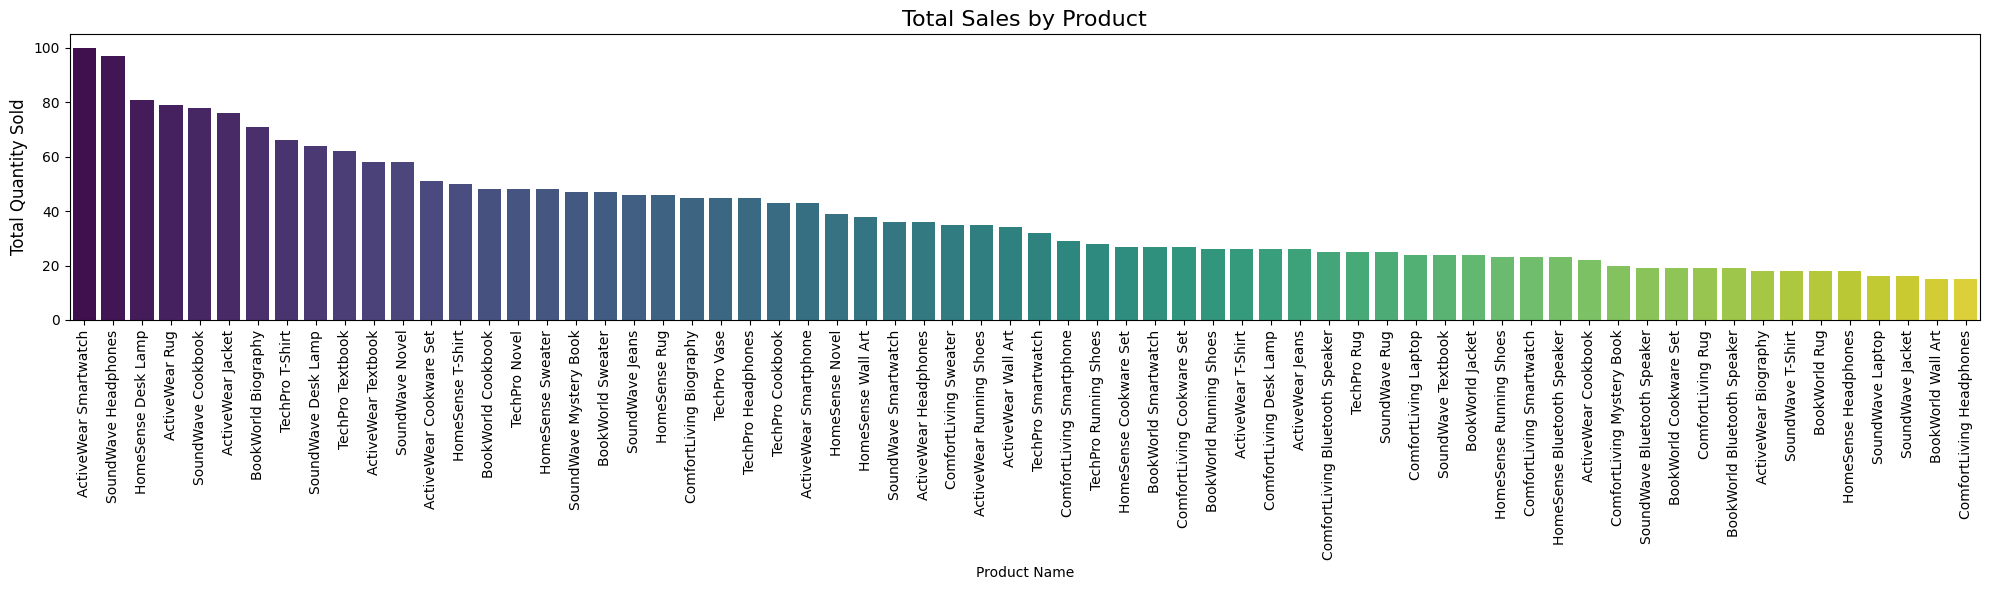

In [65]:

# Calculate total sales (quantity) by product
sales_by_product = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")
plt.title("Total Sales by Product", fontsize=16)
plt.xlabel("Product Name", fontsize=10)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

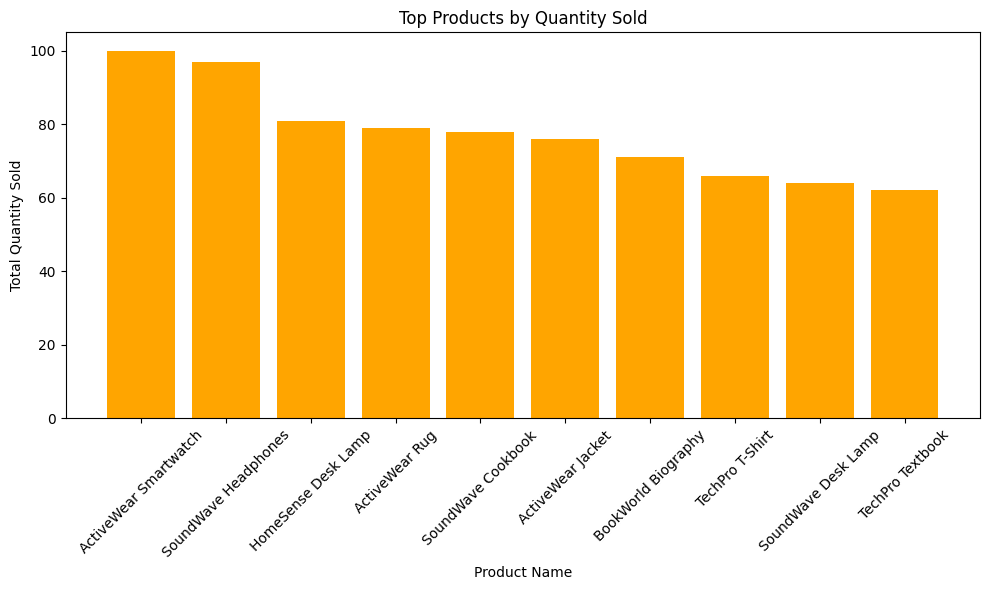

In [55]:
# Top products by quantity sold
top_products = (
    merged_data.groupby("ProductName")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(top_products["ProductName"], top_products["Quantity"], color="orange")
plt.title("Top Products by Quantity Sold")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

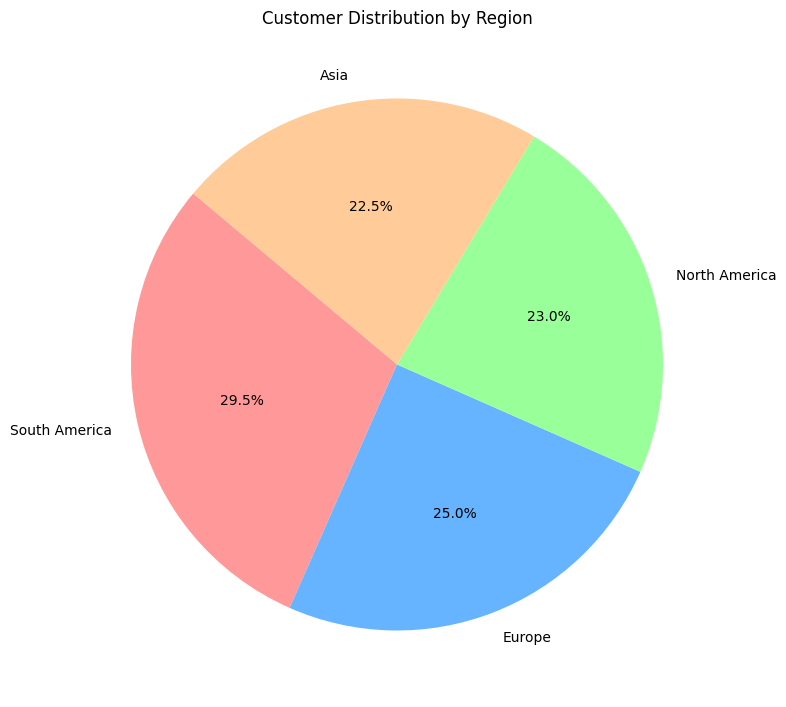

In [66]:
# Customer Distribution by Region
region_distribution = customers['Region'].value_counts().reset_index()
region_distribution.columns = ['Region', 'Number of Customers']
plt.figure(figsize=(8, 8))
plt.pie(region_distribution['Number of Customers'], labels=region_distribution['Region'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Customer Distribution by Region')
plt.tight_layout()
plt.show()